### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---
#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---


#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---


#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---


#### Entrega:

Comparta el enlace de su notebook en su repositorio de GitHub, asegurándose de que los resultados de la ejecución de las celdas (gráficas, impresiones) sean visibles.

#### Parte 1: Análisis del sistema base (en una celda de Python).

Definimos la funcion de transferencia de la planta
<TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5
Obtenemos el sistema de lazo cerrado
<TransferFunction>: sys[14]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10
Las raíces de s (polos) son:
[-3.+1.j -3.-1.j]


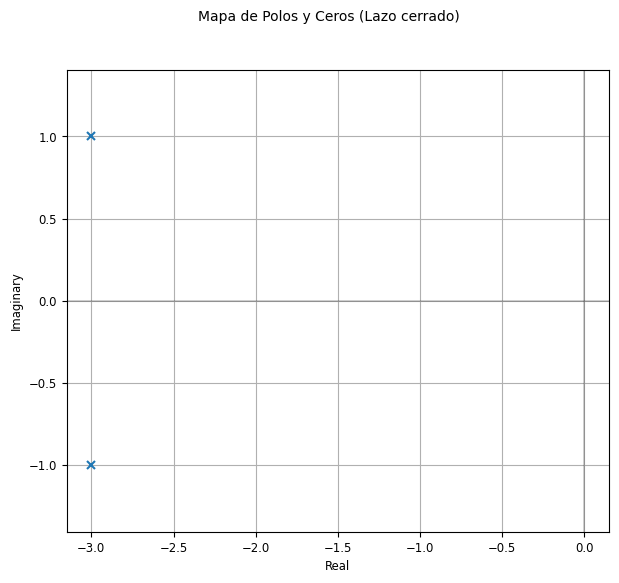

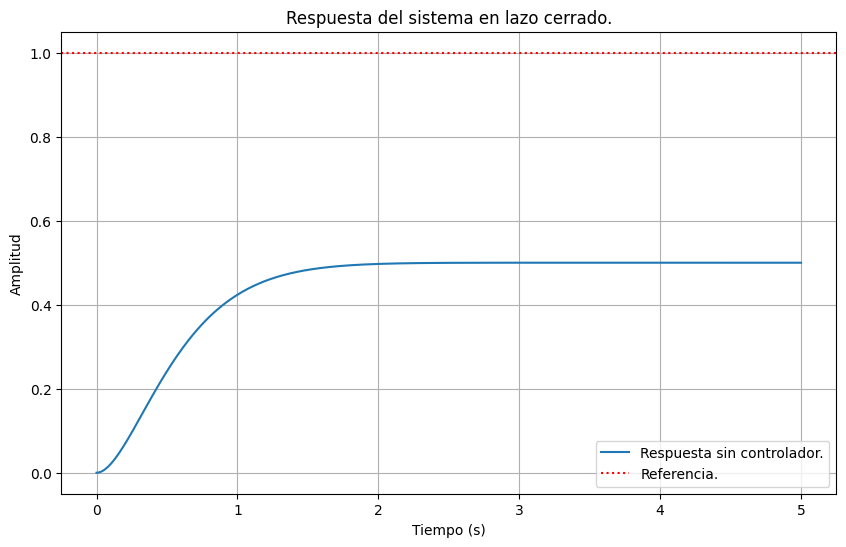

Métricas de desempeño del sistema base:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [ ]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Definición de la planta Gp(s). ---
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)
print("Definimos la funcion de transferencia de la planta")
print(Gp)

# --- Definición del sistema de lazo cerrado G_LC(s). ---
num_lc = [5]
den_lc = [1, 6, 10]
Glc = ct.tf(num_lc, den_lc)
print("Obtenemos el sistema de lazo cerrado")
print(Glc)

# --- Indicar las raíces de s (Polos del sistema). ---
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(Glc)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(Glc, title='Mapa de Polos y Ceros (Lazo cerrado)')
plt.grid(True)
plt.show()

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 5, 501)
t, y_base = ct.step_response(Glc, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Respuesta del sistema en lazo cerrado.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema base:")
info = ct.step_info(Glc)

# step_info devuelve un diccionario, podemos imprimir los valores clave.
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")

# El error en estado estacionario se verifica observando el valor final.
valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")


#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

El sistema debe cumplir:

**Error en estado estacionario = 0**  
**Sobreimpulso (Mp) < 5 %**  
**Tiempo de establecimiento (Ts) < 1.0 s**

Estas especificaciones se traducen en los parámetros dinámicos de un sistema de segundo orden:

$$T_s = \frac{4}{ζω_n} < 1.0 \quad \text{y} \quad M_p = e^{\frac{-ζπ}{\sqrt{1-ζ^2}}} < 0.05$$

De aquí se obtiene aproximadamente:

$$ζ = 0.69, \quad ω_n = 5.8$$


Polos deseados:

$$s_{1,2} = -ζω_n \pm jω_n\sqrt{1-ζ^2} \approx -4.0 \pm j4.2$$


### Modelo del sistema y del controlador

La planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$


Y el controlador PID:

$$G_c(s) = K_p + \frac{K_i}{s} + K_d s = \frac{K_d s^2 + K_p s + K_i}{s}$$

El lazo cerrado tiene como denominador:

$$s^3 + (6 + 5K_d)s^2 + (5 + 5K_p)s + 5K_i = 0$$


### Ajuste de los parámetros

Igualando los coeficientes con el polinomio deseado para que los polos se ubiquen cerca de los valores calculados, se obtienen valores aproximados:

$$K_p = 40, \quad K_i = 10, \quad K_d = 5$$


#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Definimos la funcion de transferencia de la planta
<TransferFunction>: sys[61]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  5 s^2 + 40 s + 10
  -----------------
          s
Definimos la funcion de transferencia de la planta
<TransferFunction>: sys[62]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     25 s^2 + 200 s + 50
  -------------------------
  s^3 + 31 s^2 + 205 s + 50
Las raíces de s (polos) son:
[-21.62876304+0.j  -9.11769294+0.j  -0.25354401+0.j]


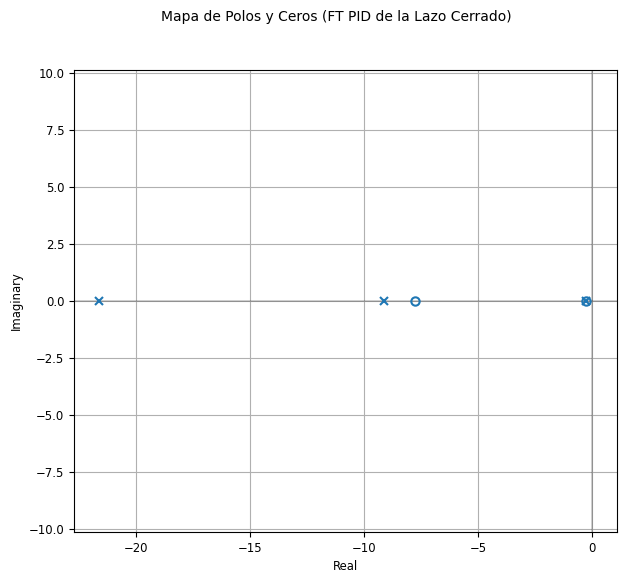

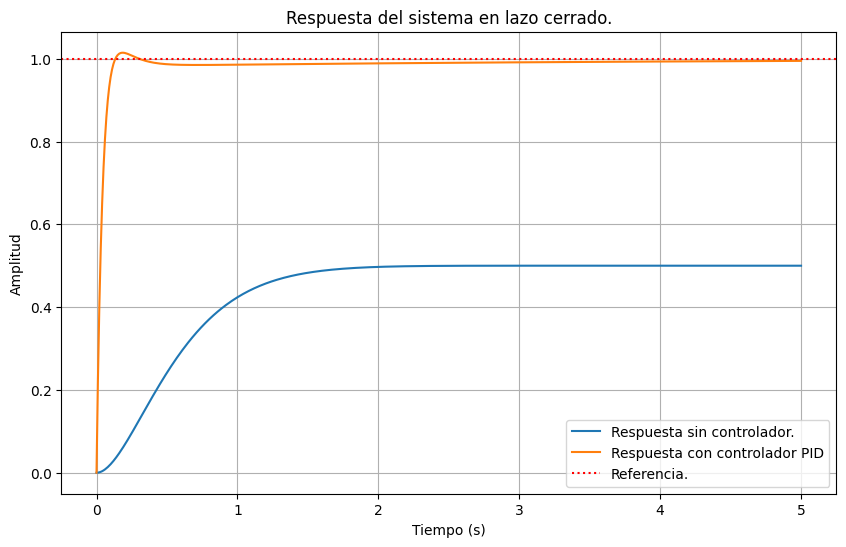

Métricas de desempeño del sistema base:
  - Sobreimpulso (Overshoot): 1.45%
  - Tiempo de establecimiento (SettlingTime): 0.11 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [19]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Definicion de las ganancias Kp, Ki y Kd.
Kp = 40
Ki = 10
Kd = 5

# --- Definición de la planta FT PID. ---
num_pid = [Kd, Kp, Ki]
den_pid = [1, 0]
Gpid = ct.tf(num_pid, den_pid)
print("Definimos la funcion de transferencia de la planta")
print(Gpid)

# --- Definición de la FT del PID de lazo cerrado. ---
num_LCpid = [25, 200, 50]
den_LCpid = [1, 31, 205, 50]
GLCpid = ct.tf(num_LCpid, den_LCpid)
print("Definimos la funcion de transferencia de la planta")
print(GLCpid)

# --- Indicar las raíces de s (Polos del sistema). ---
# Usamos la función ct.poles() para obtener las raíces del denominador.
polospid = ct.poles(GLCpid)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polospid)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(GLCpid, title='Mapa de Polos y Ceros (FT PID de la Lazo Cerrado)')
plt.grid(True)
plt.show()


# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 5, 501)
t, y_base = ct.step_response(Glc, T=t)
t, y_PID = ct.step_response(GLCpid, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_PID, label="Respuesta con controlador PID")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Respuesta del sistema en lazo cerrado.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema base:")
info = ct.step_info(GLCpid)

# step_info devuelve un diccionario, podemos imprimir los valores clave.
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")

# El error en estado estacionario se verifica observando el valor final.
valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")


